<a href="https://colab.research.google.com/github/Awakehsh/book-recommender-system/blob/main/book_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  ÂØºÂÖ•Â∫ì
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
import torch
from transformers import BertTokenizer, BertModel, BatchEncoding
from torch.utils.data import Dataset, DataLoader  # for batch
import os
import random  # for sampling
import warnings
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
!pip install implicit
from implicit.als import AlternatingLeastSquares
from tqdm import tqdm
pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')
#!wget https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv -O ratings.csv
#!wget https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/tags.csv -O tags.csv
#!wget https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/book_tags.csv -O book_tags.csv
!wget https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/to_read.csv -O to_read.csv
# ÊåÇËΩΩDrive
from google.colab import drive
drive.mount('/content/drive')
pd.set_option('display.max_columns', 500)
warnings.filterwarnings('ignore')
# Âä†ËΩΩmergedÊï∞ÊçÆ
output_path = '/content/drive/MyDrive/goodbooks_des_tags.csv'
df_books = pd.read_csv(output_path, encoding='utf-8')
print("Âä†ËΩΩÂΩ¢Áä∂:", df_books.shape)
print(df_books.head())  # Ê£ÄÊü•
print(df_books.isnull().sum())  # Á©∫ÂÄº

# Ê∏ÖÊ¥ó
df_books.dropna(subset=['description'], inplace=True)

#df_ratings = pd.read_csv('ratings.csv')
df_to_read = pd.read_csv('to_read.csv')
print(len(df_to_read))


df_to_read['value'] = 1  # ÊòæÂºèÊ†áËÆ∞Ë°å‰∏∫
pivot = df_to_read.pivot_table(index='user_id', columns='book_id', values='value', fill_value=0)
print("pivotÂΩ¢Áä∂:", pivot.shape)
display(pivot)


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.9/8.9 MB 17.7 MB/s eta 0:00:00
--2025-08-05 13:31:54--  https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/to_read.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9407334 (9.0M) [text/plain]
Saving to: ‚Äòto_read.csv‚Äô

to_read.csv         100%[===================>]   8.97M  21.1MB/s    in 0.4s    

2025-08-05 13:31:55 (21.1 MB/s) - ‚Äòto_read.csv‚Äô saved [9407334/9407334]

Mounted at /content/drive
Âä†ËΩΩÂΩ¢Áä∂: (10000, 26)
   book_id  goodreads_book_id  best_book_id  work_id  books_count       isbn  \
0        1            2767052       2767052  2792775          272  439023483   
1        2                  3     

book_id  1      2      3      4      5      6      7      8      9      10     \
user_id                                                                         
1          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2          0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
3          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
5          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
53420      0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
53421      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
53422      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
53423      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
53424      0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   

book_id  11     12     13     14     15     16     17     18     19     20     \
user_id                                                                         
1          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2          1.0    0.0    1.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
3          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
53420      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
53421      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
53422      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
53423      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
53424      1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

book_id  21     22     23     24     25     26     27     28     29     30     \
user_id                                                                         
1          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
53420      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
53421      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
53422      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
53423      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
53424      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

book_id  31     32     33     34     35     36     37     38     39     40     \
user_id                                                                         
1          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
5          1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
6          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
53420      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
53421      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
53422      0.0    0.0    0.0

## EDA


df_to_read ÂΩ¢Áä∂: (912705, 3)
             user_id        book_id     value
count  912705.000000  912705.000000  912705.0
mean    27668.980115    2454.739538       1.0
std     14775.096388    2626.359921       0.0
min         1.000000       1.000000       1.0
25%     15507.000000     360.000000       1.0
50%     27799.000000    1381.000000       1.0
75%     40220.000000    3843.000000       1.0
max     53424.000000   10000.000000       1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  912705 non-null  int64
 1   book_id  912705 non-null  int64
 2   value    912705 non-null  int64
dtypes: int64(3)
memory usage: 20.9 MB
None
Áã¨ÁâπÁî®Êà∑Êï∞: 48871
Áã¨Áâπ‰π¶Á±çÊï∞: 9986
Pivot ÂΩ¢Áä∂: (48871, 9986)
Áü©ÈòµÁ®ÄÁñèÂ∫¶: 0.9981 (Ë∂äÈ´òË∂äÁ®ÄÁñèÔºåÂÖ∏ÂûãÊé®ËçêÊï∞ÊçÆ>0.99)
Áî®Êà∑Ê†áËÆ∞‰π¶Êï∞ÁªüËÆ°:
count    48871.000000
mean        18.675800
std  

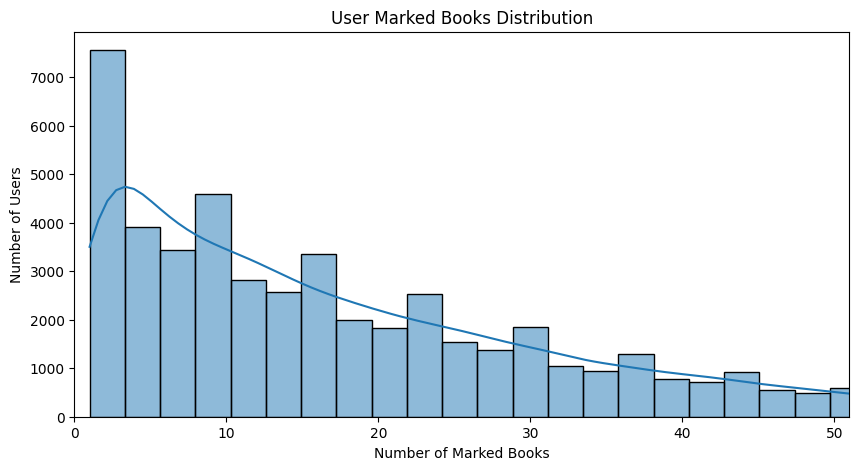

Top 5 Ê¥ªË∑ÉÁî®Êà∑:
user_id
38457    117
28259    114
38076    110
44530    108
46000    107
Name: book_id, dtype: int64
‰π¶Á±çË¢´Ê†áËÆ∞ÁªüËÆ°:
count    9986.000000
mean       91.398458
std       160.557963
min         1.000000
25%        20.000000
50%        42.000000
75%        90.000000
max      2772.000000
Name: user_id, dtype: float64


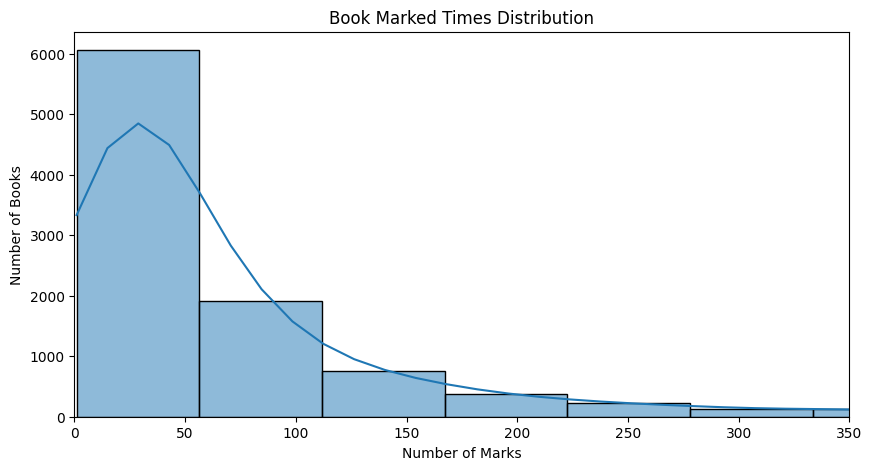

Top 10 ÁÉ≠Èó®‰π¶Á±ç:
   book_id  user_id                                              title
0       47     2772                                     The Book Thief
1      143     1967                        All the Light We Cannot See
2      113     1840                                           Catch-22
3       13     1812                                               1984
4       11     1767                                    The Kite Runner
5       45     1717                                         Life of Pi
6      139     1650  Miss Peregrine‚Äôs Home for Peculiar Children (M...
7       39     1619     A Game of Thrones (A Song of Ice and Fire, #1)
8       65     1608                                Slaughterhouse-Five
9       35     1576                                      The Alchemist
ÊèèËø∞ÈïøÂ∫¶ÁªüËÆ°:
count    10000.000000
mean       782.887500
std        576.311325
min         14.000000
25%        391.750000
50%        735.500000
75%       1057.250000
max       7638.000000


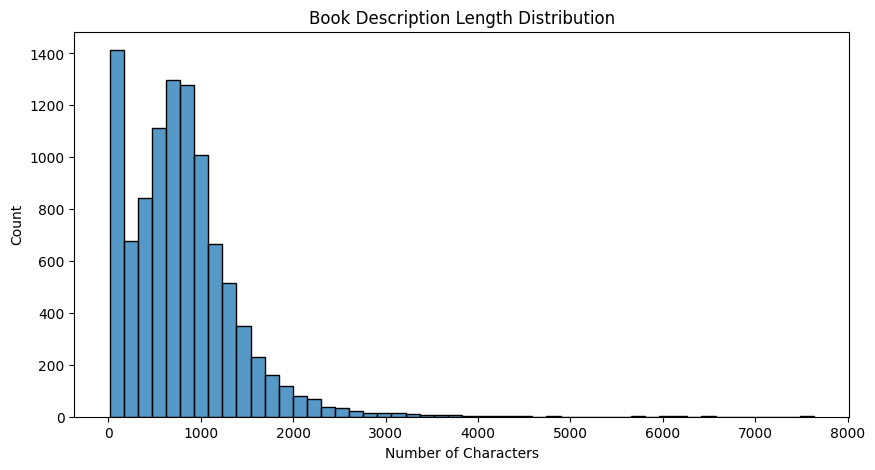

Top 20 Â∏∏ËßÅËØç: ['best' 'book' 'family' 'just' 'life' 'like' 'love' 'man' 'new' 'novel'
 'old' 'people' 'story' 'time' 'way' 'world' 'year' 'years' 'york' 'young']
Âπ≥ÂùáÊØè‰∏™Áî®Êà∑Ê†áËÆ∞: 18.68 Êú¨
ÂºÇÂ∏∏Ê¥ªË∑ÉÁî®Êà∑Êï∞ (> 68.0): 462
Âπ≥ÂùáÊØè‰∏™Áî®Êà∑Ê†áËÆ∞: 18.68 Êú¨
ÂºÇÂ∏∏Ê¥ªË∑ÉÁî®Êà∑Êï∞ (> 68.0): 462


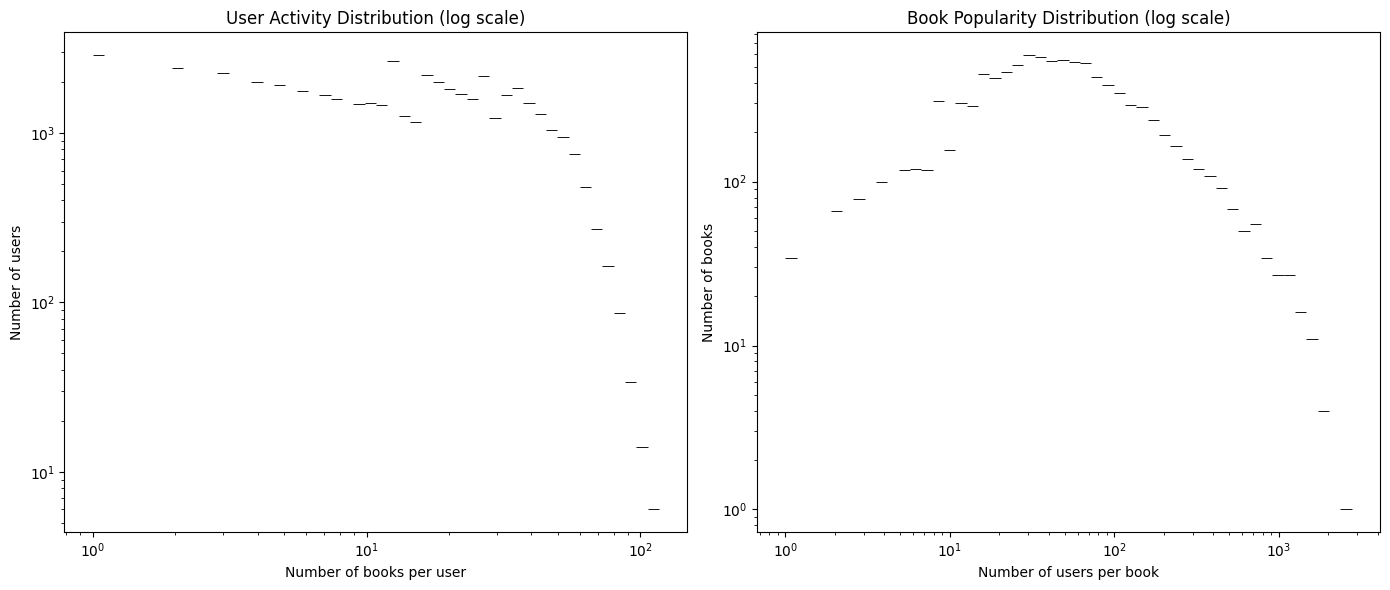

Áî®Êà∑‰∫§‰∫íÊï∞ÂàÜÂ∏ÉÊèèËø∞Ôºö
count    48871.000000
mean        18.675800
std         16.089767
min          1.000000
25%          6.000000
50%         14.000000
75%         27.000000
max        117.000000
Name: book_id, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
# ÂÆâË£ÖÂ≠ó‰Ωì

# ÂØπ‰∫édf_to_readÔºàÂéüÂßã‰∫íÂä®Êï∞ÊçÆÔºâ
print("df_to_read ÂΩ¢Áä∂:", df_to_read.shape)
print(df_to_read.describe())  # ÁªüËÆ°ÊÄªÁªìÔºåÂ¶Çuser_idÂíåbook_idÁöÑËåÉÂõ¥
print(df_to_read.info())  # Êï∞ÊçÆÁ±ªÂûãÂíåÈùûÁ©∫ËÆ°Êï∞
print("Áã¨ÁâπÁî®Êà∑Êï∞:", df_to_read['user_id'].nunique())
print("Áã¨Áâπ‰π¶Á±çÊï∞:", df_to_read['book_id'].nunique())

# ÂØπ‰∫épivotË°®ÔºàÁî®Êà∑-‰π¶Á±çÁü©ÈòµÔºâ
print("Pivot ÂΩ¢Áä∂:", pivot.shape)  # Ë°å=Áî®Êà∑ÔºåÂàó=‰π¶Á±ç
sparsity = 1 - (df_to_read.shape[0] / (pivot.shape[0] * pivot.shape[1]))
print(f"Áü©ÈòµÁ®ÄÁñèÂ∫¶: {sparsity:.4f} (Ë∂äÈ´òË∂äÁ®ÄÁñèÔºåÂÖ∏ÂûãÊé®ËçêÊï∞ÊçÆ>0.99)")
# ËÆ°ÁÆóÊØè‰∏™Áî®Êà∑Ê†áËÆ∞ÁöÑ‰π¶Êï∞
user_activity = df_to_read.groupby('user_id')['book_id'].count().sort_values(ascending=False)
print("Áî®Êà∑Ê†áËÆ∞‰π¶Êï∞ÁªüËÆ°:")
print(user_activity.describe())  # ÂùáÂÄº„ÄÅ‰∏≠‰ΩçÊï∞Á≠â

# ÂèØËßÜÂåñÔºöÁõ¥ÊñπÂõæÔºàÂè™ÁúãÂâç1000ÈÅøÂÖçÈïøÂ∞æÔºâ
plt.figure(figsize=(10, 5))
sns.histplot(user_activity, bins=50, kde=True)
plt.title('User Marked Books Distribution')
plt.xlabel('Number of Marked Books')
plt.ylabel('Number of Users')
plt.xlim(0, user_activity.quantile(0.95))  # ÂøΩÁï•ÊûÅÁ´ØÂÄº
plt.show()

# È°∂Á∫ßÊ¥ªË∑ÉÁî®Êà∑
print("Top 5 Ê¥ªË∑ÉÁî®Êà∑:")
print(user_activity.head())
# ËÆ°ÁÆóÊØè‰∏™‰π¶Á±çË¢´Ê†áËÆ∞Ê¨°Êï∞
book_popularity = df_to_read.groupby('book_id')['user_id'].count().sort_values(ascending=False)
print("‰π¶Á±çË¢´Ê†áËÆ∞ÁªüËÆ°:")
print(book_popularity.describe())

# ÂèØËßÜÂåñ
plt.figure(figsize=(10, 5))
sns.histplot(book_popularity, bins=50, kde=True)
plt.title('Book Marked Times Distribution')
plt.xlabel('Number of Marks')
plt.ylabel('Number of Books')
plt.xlim(0, book_popularity.quantile(0.95))
plt.show()

# È°∂Á∫ßÁÉ≠Èó®‰π¶Á±çÔºàÂêàÂπ∂df_booksÁúãÊ†áÈ¢òÔºâ
top_books = book_popularity.head(10).reset_index()
top_books = top_books.merge(df_books[['book_id', 'title']], on='book_id', how='left')
print("Top 10 ÁÉ≠Èó®‰π¶Á±ç:")
print(top_books)
# ÊèèËø∞ÈïøÂ∫¶ÂàÜÂ∏É
df_books['desc_length'] = df_books['description'].apply(len)
print("ÊèèËø∞ÈïøÂ∫¶ÁªüËÆ°:")
print(df_books['desc_length'].describe())

# ÂèØËßÜÂåñ
plt.figure(figsize=(10, 5))
sns.histplot(df_books['desc_length'], bins=50)
plt.title('Book Description Length Distribution')
plt.xlabel('Number of Characters')
plt.show()

# Â∏∏ËßÅËØçÔºàÁî®TF-IDFÁÆÄÂçïÁúãÔºå‰ΩÜÂÖàËØçÈ¢ëÔºâ
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english', max_features=20)
word_counts = vectorizer.fit_transform(df_books['description'])
common_words = vectorizer.get_feature_names_out()
print("Top 20 Â∏∏ËßÅËØç:", common_words)
# Áî®Êà∑Âπ≥ÂùáÊ†áËÆ∞‰π¶Êï∞
avg_marks = user_activity.mean()
print(f"Âπ≥ÂùáÊØè‰∏™Áî®Êà∑Ê†áËÆ∞: {avg_marks:.2f} Êú¨")

# ÂºÇÂ∏∏ÔºöÊ†áËÆ∞>ÈòàÂÄºÁöÑÁî®Êà∑Ôºàe.g., 99ÂàÜ‰ΩçÔºâ
threshold = user_activity.quantile(0.99)
outliers = user_activity[user_activity > threshold]
print(f"ÂºÇÂ∏∏Ê¥ªË∑ÉÁî®Êà∑Êï∞ (> {threshold}): {len(outliers)}")
# Áî®Êà∑Âπ≥ÂùáÊ†áËÆ∞‰π¶Êï∞
avg_marks = user_activity.mean()
print(f"Âπ≥ÂùáÊØè‰∏™Áî®Êà∑Ê†áËÆ∞: {avg_marks:.2f} Êú¨")

# ÂºÇÂ∏∏ÔºöÊ†áËÆ∞>ÈòàÂÄºÁöÑÁî®Êà∑Ôºàe.g., 99ÂàÜ‰ΩçÔºâ
threshold = user_activity.quantile(0.99)
outliers = user_activity[user_activity > threshold]
print(f"ÂºÇÂ∏∏Ê¥ªË∑ÉÁî®Êà∑Êï∞ (> {threshold}): {len(outliers)}")


# Áî®Êà∑Ê¥ªË∑ÉÂ∫¶ÂàÜÂ∏ÉÔºöÊØè‰∏™Áî®Êà∑‰∫§‰∫í‰∫ÜÂ§öÂ∞ëÊú¨‰π¶
user_counts = df_to_read.groupby('user_id')['book_id'].count()

# Âõæ‰π¶ÁÉ≠Â∫¶ÂàÜÂ∏ÉÔºöÊØèÊú¨‰π¶Ë¢´Â§öÂ∞ëÁî®Êà∑‰∫§‰∫í
book_counts = df_to_read.groupby('book_id')['user_id'].count()

plt.figure(figsize=(14, 6))

# Áî®Êà∑Ê¥ªË∑ÉÂ∫¶Áõ¥ÊñπÂõæ
plt.subplot(1, 2, 1)
sns.histplot(user_counts, bins=50, log_scale=(True, True))
plt.title("User Activity Distribution (log scale)")
plt.xlabel("Number of books per user")
plt.ylabel("Number of users")

# Âõæ‰π¶ÁÉ≠Â∫¶Áõ¥ÊñπÂõæ
plt.subplot(1, 2, 2)
sns.histplot(book_counts, bins=50, log_scale=(True, True))
plt.title("Book Popularity Distribution (log scale)")
plt.xlabel("Number of users per book")
plt.ylabel("Number of books")

plt.tight_layout()
plt.show()
user_counts = df_to_read.groupby('user_id')['book_id'].count()
print("Áî®Êà∑‰∫§‰∫íÊï∞ÂàÜÂ∏ÉÊèèËø∞Ôºö")
print(user_counts.describe())


## ÂáΩÊï∞ÂØºÂÖ•


In [ ]:
# Step 1: Data Preprocessing
# Filter out cold users and books to reduce sparsity and improve efficiency
min_user_marks = 5
min_book_marks = 20
# Data Preprocessing Function
def preprocess_data(interactions_df, min_user_marks=6, min_book_marks=20):
    """
    Filter out cold users and books to reduce sparsity.

    Args:
        interactions_df (pd.DataFrame): User-book interaction data.
        min_user_marks (int): Minimum interactions per user.
        min_book_marks (int): Minimum interactions per book.

    Returns:
        pd.DataFrame: Filtered interaction data.
    """
    df_filtered = interactions_df.copy()
    while True:
        old_len = len(df_filtered)
        user_act = df_filtered.groupby('user_id')['book_id'].count()
        df_filtered = df_filtered[df_filtered['user_id'].isin(user_act[user_act >= min_user_marks].index)]
        book_pop = df_filtered.groupby('book_id')['user_id'].count()
        df_filtered = df_filtered[df_filtered['book_id'].isin(book_pop[book_pop >= min_book_marks].index)]
        if len(df_filtered) == old_len:
            break
    print("Filtered interactions:", len(df_filtered))
    return df_filtered
def evaluate_cf(train_df, test_df, recommend_func, pivot, K=5, sample_users=500):
    """
    Evaluate CF recommendation function using Precision@K, Recall@K, and HitRate@K.

    Args:
        train_df (pd.DataFrame): Training data.
        test_df (pd.DataFrame): Test data.
        recommend_func (function): Recommendation function to evaluate.
        pivot (pd.DataFrame): User-item pivot table.
        K (int): Number of recommendations.
        sample_users (int): Number of users to sample for evaluation.

    Returns:
        dict: Evaluation metrics.
    """
    test_users = list(set(test_df['user_id'].unique()) & set(pivot.index))
    test_users = [u for u in test_users if pivot.loc[u].sum() > 0]

    if sample_users:
        random.seed(42)
        test_users = random.sample(test_users, min(sample_users, len(test_users)))

    prec_sum, rec_sum, hit_users = 0.0, 0.0, 0
    for u in tqdm(test_users, desc=f"Evaluating {recommend_func.__name__}"):
        pos_items = set(test_df[test_df['user_id'] == u]['book_id'])
        recs = set(recommend_func(u, K, pivot=pivot)['book_id'])
        hit = len(recs & pos_items)
        prec_sum += hit / K
        rec_sum += hit / max(1, len(pos_items))
        if hit > 0:
            hit_users += 1

    n = len(test_users)
    if n == 0:
        return {'Precision@K': 0, 'Recall@K': 0, 'HitRate@K': 0}
    return {
        'users': n,
        'Precision@K': prec_sum / n,
        'Recall@K': rec_sum / n,
        'HitRate@K': hit_users / n
    }

# Evaluation Function for CBF
def evaluate_cbf(test_df, recommend_func, books_df, K=5, sample_users=500):
    """ËØÑ‰º∞CBFÊé®ËçêÂáΩÊï∞ÁöÑPrecision@K, Recall@K, HitRate@K"""
    test_users = test_df['user_id'].unique()
    if sample_users:
        random.seed(42)
        test_users = random.sample(list(test_users), min(sample_users, len(test_users)))

    prec_sum, rec_sum, hit_users = 0.0, 0.0, 0
    for u in tqdm(test_users, desc=f"Evaluating {recommend_func.__name__}"):
        pos_items = set(test_df[test_df['user_id'] == u]['book_id'])
        recs = set(recommend_func(u, K, interactions_df=train)['book_id'])  # Áî®train‰Ωú‰∏∫ÂéÜÂè≤
        hit = len(recs & pos_items)
        prec_sum += hit / K
        rec_sum += hit / max(1, len(pos_items))
        if hit > 0:
            hit_users += 1

    n = len(test_users)
    if n == 0:
        return {'Precision@K': 0, 'Recall@K': 0, 'HitRate@K': 0}
    return {
        'users': n,
        'Precision@K': prec_sum / n,
        'Recall@K': rec_sum / n,
        'HitRate@K': hit_users / n
    }

# HybridËØÑ‰ª∑ÂáΩÊï∞
def evaluate_hybrid(train, test, recommender, pivot, K=5, **kwargs):
    """ËØÑ‰º∞hybridÊ®°ÂûãÔºåÊîØÊåÅÈ¢ùÂ§ñÂèÇÊï∞‰º†ÈÄíÁªôrecommenderÔºàÂ∑≤ÈÄÇÂ∫îweightedÔºâ"""
    users = test['user_id'].unique()[:500]  # ÂÅáËÆæÂèñÂâç500Áî®Êà∑
    precision, recall, hit = [], [], []

    for user_id in tqdm(users, desc="Evaluating recommend_hybrid"):
        test_books = set(test[test['user_id'] == user_id]['book_id'])
        if not test_books:
            continue
        rec_df = recommender(user_id, K, pivot, **kwargs)  # ‰º†ÈÄí**kwargsÔºàÂè™cf_weightÂíåcbf_weightÔºâ
        rec_books = set(rec_df['book_id'])

        hits = len(rec_books & test_books)
        precision.append(hits / K if K > 0 else 0)
        recall.append(hits / len(test_books) if len(test_books) > 0 else 0)
        hit.append(1 if hits > 0 else 0)
    n = len(users)
    metrics = {
        'users': n,
        'Precision@K': sum(precision) / n,
        'Recall@K': sum(recall) / n,
        'HitRate@K': sum(hit) / n
    }
    return metrics
df_filtered = preprocess_data(df_to_read)
display(df_filtered.head())
train, test = train_test_split(df_filtered, test_size=0.2, random_state=42)


Filtered interactions: 849075


user_id  book_id  value
0        9        8      1
1       15      398      1
2       15      275      1
4       34      380      1
5       34      483      1

##cf


In [ ]:
pivot_train = train.pivot_table(index='user_id', columns='book_id', values='value', fill_value=0)
item_ids = pivot_train.columns.to_numpy()
user_ids = pivot_train.index.to_numpy()
item_pos = {bid: i for i, bid in enumerate(item_ids)}
user_pos = {uid: i for i, uid in enumerate(user_ids)}
# Sparse matrices for item-based and user-based models
item_matrix_sparse = csr_matrix(pivot_train.T)  # Books x Users
user_matrix_sparse = csr_matrix(pivot_train)    # Users x Books
print("Item matrix shape:", item_matrix_sparse.shape)
print("User matrix shape:", user_matrix_sparse.shape)

Item matrix shape: (7373, 36888)
User matrix shape: (36888, 7373)


### memory base


In [ ]:
# Item-based KNN
knn_item = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn_item.fit(item_matrix_sparse)
def recommend_item_knn(user_id, K=5, pivot=pivot_train):
    """Recommend top-K books using item-based KNN."""
    if user_id not in pivot.index:
        return pd.DataFrame()  # Handle cold-start
    user_row = pivot.loc[user_id]
    seeds = user_row[user_row > 0].index.to_list()
    if not seeds:
        return pd.DataFrame()
    scores = {}
    seed_indices = [item_pos.get(b) for b in seeds if item_pos.get(b) is not None]
    if not seed_indices:
        return pd.DataFrame()
    seed_vectors = item_matrix_sparse[seed_indices]
    dist, ind = knn_item.kneighbors(seed_vectors, n_neighbors=K+1)

    # Aggregate scores
    for i in range(len(seed_indices)):
        distances = dist[i][1:]  # Skip self
        indices = ind[i][1:]     # Skip self
        for j, d in zip(indices, distances):
            cand = item_ids[j]
            if cand in seeds:
                continue
            scores[cand] = scores.get(cand, 0) + (1 - d)

    if scores:
        num_seeds = len(seeds)
        for cand in scores:
            scores[cand] /= num_seeds  # Normalize scores

    sorted_recs = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:K]
    rec_books = [bid for bid, _ in sorted_recs]
    rec_df = pd.DataFrame({'book_id': rec_books}).merge(df_books[['book_id', 'title']], on='book_id', how='left')
    return rec_df

user_id = 1
K = 5

# Item-based KNN
print(f"\nÁî®Êà∑ {user_id} Âú®ËÆ≠ÁªÉÈõÜ‰∏≠ÁöÑÈòÖËØªËÆ∞ÂΩïÔºö")
print(train[train['user_id'] == user_id].merge(df_books[['book_id', 'title']], on='book_id', how='left'))
print(f"\nÁî®Êà∑ {user_id} Âú®ÊµãËØïÈõÜ‰∏≠ÁöÑÈòÖËØªËÆ∞ÂΩïÔºö")
print(test[test['user_id'] == user_id].merge(df_books[['book_id', 'title']], on='book_id', how='left'))
print(f"\nÁî®Êà∑ {user_id} ÁöÑ Top-{K} Êé®Ëçê (Item-based KNN)Ôºö")
print(recommend_item_knn(user_id, K))

print("\nEvaluating models...")
metrics_item_knn = evaluate_cf(train, test, recommend_item_knn, pivot_train, K=5)
print("Item-based KNN metrics:", metrics_item_knn)


Áî®Êà∑ 1 Âú®ËÆ≠ÁªÉÈõÜ‰∏≠ÁöÑÈòÖËØªËÆ∞ÂΩïÔºö
   user_id  book_id  value                                            title
0        1     1874      1                               The Aviator's Wife
1        1      533      1                                Go Set a Watchman
2        1     3334      1                        The Marriage of Opposites
3        1      112      1                Me Before You (Me Before You, #1)
4        1     1198      1                                    A Little Life
5        1     2058      1  My Grandmother Asked Me to Tell You She's Sorry

Áî®Êà∑ 1 Âú®ÊµãËØïÈõÜ‰∏≠ÁöÑÈòÖËØªËÆ∞ÂΩïÔºö
   user_id  book_id  value                 title
0        1      235      1  The Husband's Secret

Áî®Êà∑ 1 ÁöÑ Top-5 Êé®Ëçê (Item-based KNN)Ôºö
   book_id                        title
0      267              The Nightingale
1     1220             Fates and Furies
2       61        The Girl on the Train
3      143  All the Light We Cannot See
4     2003             Circling the

Evaluating recommend_item_knn: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:19<00:00, 25.48it/s]

Item-based KNN metrics: {'users': 500, 'Precision@K': 0.06559999999999992, 'Recall@K': 0.0699199723621079, 'HitRate@K': 0.24}


In [ ]:
# User-based KNN
knn_user = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn_user.fit(user_matrix_sparse)
def recommend_user_knn(user_id, K=5, pivot=pivot_train):
    """Recommend top-K books using user-based KNN."""
    if user_id not in pivot.index:
        return pd.DataFrame()  # Handle cold-start
    user_idx = user_pos.get(user_id)
    if user_idx is None:
        return pd.DataFrame()

    user_vec = user_matrix_sparse[user_idx]
    dist, ind = knn_user.kneighbors(user_vec, n_neighbors=20)  # Fetch more neighbors
    dist = dist.ravel()[1:]  # Skip self
    ind = ind.ravel()[1:]

    user_books = set(pivot.loc[user_id][pivot.loc[user_id] > 0].index)
    scores = {}
    for neighbor_idx, distance in zip(ind, dist):
        neighbor_id = user_ids[neighbor_idx]
        neighbor_books = set(pivot.loc[neighbor_id][pivot.loc[neighbor_id] > 0].index)
        for book in neighbor_books:
            if book in user_books:
                continue
            scores[book] = scores.get(book, 0) + (1 - distance)

    if scores:
        num_neighbors = len(ind)
        for book in scores:
            scores[book] /= num_neighbors  # Normalize scores

    sorted_recs = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:K]
    rec_books = [bid for bid, _ in sorted_recs]
    rec_df = pd.DataFrame({'book_id': rec_books}).merge(df_books[['book_id', 'title']], on='book_id', how='left')
    return rec_df

# User-based KNN
user_id = 1
K = 5

# Item-based KNN
print(f"\nÁî®Êà∑ {user_id} Âú®ËÆ≠ÁªÉÈõÜ‰∏≠ÁöÑÈòÖËØªËÆ∞ÂΩïÔºö")
print(train[train['user_id'] == user_id].merge(df_books[['book_id', 'title']], on='book_id', how='left'))
print(f"\nÁî®Êà∑ {user_id} Âú®ÊµãËØïÈõÜ‰∏≠ÁöÑÈòÖËØªËÆ∞ÂΩïÔºö")
print(test[test['user_id'] == user_id].merge(df_books[['book_id', 'title']], on='book_id', how='left'))
print(f"\n Áî®Êà∑ {user_id} ÁöÑ Top-{K} Êé®Ëçê (User-based KNN)Ôºö")
print(recommend_user_knn(user_id, K))

metrics_user_knn = evaluate_cf(train, test, recommend_user_knn, pivot_train, K=5)
print("User-based KNN metrics:", metrics_user_knn)


Áî®Êà∑ 1 Âú®ËÆ≠ÁªÉÈõÜ‰∏≠ÁöÑÈòÖËØªËÆ∞ÂΩïÔºö
   user_id  book_id  value                                            title
0        1     1874      1                               The Aviator's Wife
1        1      533      1                                Go Set a Watchman
2        1     3334      1                        The Marriage of Opposites
3        1      112      1                Me Before You (Me Before You, #1)
4        1     1198      1                                    A Little Life
5        1     2058      1  My Grandmother Asked Me to Tell You She's Sorry

Áî®Êà∑ 1 Âú®ÊµãËØïÈõÜ‰∏≠ÁöÑÈòÖËØªËÆ∞ÂΩïÔºö
   user_id  book_id  value                 title
0        1      235      1  The Husband's Secret

 Áî®Êà∑ 1 ÁöÑ Top-5 Êé®Ëçê (User-based KNN)Ôºö
   book_id                  title
0     1028     Truly Madly Guilty
1     3908           The Royal We
2     1740  In the Unlikely Event
3     1220       Fates and Furies
4     3064                 Purity


Evaluating recommend_user_knn: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:20<00:00, 24.99it/s]

User-based KNN metrics: {'users': 500, 'Precision@K': 0.04799999999999996, 'Recall@K': 0.049963532219414554, 'HitRate@K': 0.168}


### model base

In [ ]:
# ALS (Model-based Collaborative Filtering)
als_model = AlternatingLeastSquares(factors=100, iterations=50, regularization=0.1, random_state=42)
als_model.fit(user_matrix_sparse)

def recommend_als(user_id, K=5, pivot=pivot_train):
    """Recommend top-K books using ALS."""
    if user_id not in pivot.index:
        return pd.DataFrame()  # Handle cold-start
    user_idx = user_pos.get(user_id)
    if user_idx is None:
        return pd.DataFrame()

    rec_indices, scores = als_model.recommend(user_idx, user_matrix_sparse[user_idx], N=K, filter_already_liked_items=True)
    rec_books = item_ids[rec_indices]
    rec_df = pd.DataFrame({'book_id': rec_books}).merge(df_books[['book_id', 'title']], on='book_id', how='left')
    return rec_df


# ALS
user_id = 1
K = 5

print(f"\nÁî®Êà∑ {user_id} Âú®ËÆ≠ÁªÉÈõÜ‰∏≠ÁöÑÈòÖËØªËÆ∞ÂΩïÔºö")
print(train[train['user_id'] == user_id].merge(df_books[['book_id', 'title']], on='book_id', how='left'))
print(f"\nÁî®Êà∑ {user_id} Âú®ÊµãËØïÈõÜ‰∏≠ÁöÑÈòÖËØªËÆ∞ÂΩïÔºö")
print(test[test['user_id'] == user_id].merge(df_books[['book_id', 'title']], on='book_id', how='left'))
print(f"\nÁî®Êà∑ {user_id} ÁöÑ Top-{K} Êé®Ëçê (ALS)Ôºö")
print(recommend_als(user_id, K))

metrics_als = evaluate_cf(train, test, recommend_als, pivot_train, K=5)
print("ALS metrics:", metrics_als)

  0%|          | 0/50 [00:00<?, ?it/s]


Áî®Êà∑ 1 Âú®ËÆ≠ÁªÉÈõÜ‰∏≠ÁöÑÈòÖËØªËÆ∞ÂΩïÔºö
   user_id  book_id  value                                            title
0        1     1874      1                               The Aviator's Wife
1        1      533      1                                Go Set a Watchman
2        1     3334      1                        The Marriage of Opposites
3        1      112      1                Me Before You (Me Before You, #1)
4        1     1198      1                                    A Little Life
5        1     2058      1  My Grandmother Asked Me to Tell You She's Sorry

Áî®Êà∑ 1 Âú®ÊµãËØïÈõÜ‰∏≠ÁöÑÈòÖËØªËÆ∞ÂΩïÔºö
   user_id  book_id  value                 title
0        1      235      1  The Husband's Secret

Áî®Êà∑ 1 ÁöÑ Top-5 Êé®Ëçê (ALS)Ôºö
   book_id                                              title
0      470  I Am Malala: The Story of the Girl Who Stood U...
1       83                               A Tale of Two Cities
2      267                                    The Nightingal

Evaluating recommend_als: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:05<00:00, 84.19it/s] 

ALS metrics: {'users': 500, 'Precision@K': 0.03599999999999996, 'Recall@K': 0.0354435745197355, 'HitRate@K': 0.15}


##cbf


In [ ]:
# ÁßªÈô§Êó†Êïàtags
print(len(df_filtered))
print(df_books['tag_name'].isna().sum())  # Á©∫ÂÄºÊï∞ = 0
print((df_books['tag_name'].str.strip().str.lower() == "no tags").sum())  # Êó†ÊïàtagÊï∞ = 0
print((df_books['tag_name'].str.strip() == "").sum())  # Á©∫Â≠óÁ¨¶‰∏≤Êï∞ = 0



849075
0
0
0


### TF‚Äîidf


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Ëá™ÂÆö‰πâstopwordsÔºàÂèØÊåâÈúÄÊâ©ÂÖÖÔºâ
custom_stop = [
    # GoodreadsÊ†áÁ≠æËØçÔºàÊó†ËØ≠‰πâÔºâ
    'favorites', 'currently-reading', 'to-read', 'books-i-own', 'owned', 'read', 'library', 'my-books', 'tbr',
    # Êï∞Â≠óÁ±ªÔºàÂπ¥‰ªΩ„ÄÅÂ∫èÂè∑Ôºâ
    '00', '000', '01', '02', '03', '04', '06', '08', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
    '21', '22', '23', '25', '30', '33', '39', '40', '50', '52', '65', '75', '80', '90', '100', '200', '300', '500',
    '800', '1000', '1001', '10k', '20s', '80s', '90s',
    '1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th',
    '10th', '11th', '12th', '13th', '14th', '15th', '16th', '17th', '18th', '19th', '20th', '21st',
    '1500s', '1600s', '1700s', '1800', '1800s', '1830s', '1880s', '1890s', '1900', '1900s', '1910s', '1920', '1920s',
    '1930', '1930s', '1939', '1940s', '1945', '1950s', '1960', '1960s', '1970', '1970s', '1975', '1979', '1980',
    '1980s', '1987', '1988', '1989', '1990', '1990s', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
    '2000', '2000s', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2010s', '2011',
    '2012', '2013', '2014', '2015', '2016', '2017', '2018',
    # Ëã±ËØ≠ÈÄöÁî®ÂÅúÁî®ËØçÔºàÈÉ®ÂàÜÔºâ
    'an', 'and', 'as', 'at', 'against', 'after', 'again', 'always', 'are', 'about', 'actual', 'actually',
    # ‰∏éÂá∫ÁâàÊ†ºÂºè„ÄÅÁä∂ÊÄÅÁõ∏ÂÖ≥ÔºàÊó†‰ø°ÊÅØÈáèÔºâ
    'arc', 'arcs', 'audible', 'available', 'added', 'already', 'adapted', 'adaptation',
    'adaptations',
    # È´òÈ¢ëÂûÉÂúæËØç / Êó†Âà§Âà´ÂäõÊ†áÁ≠æËØç
    'books', 'fiction', 'book', 'abc', '0wn', 'abandonados', 'abandoned', 'abandonment',
    'absolute', 'absolutely', 'absurd', 'absurdism', 'actor',
    'actors', 'actresses', 'adolescence', 'adolescent','adultery', 'addiction',
    'affairs', 'affair', 'adaptation', 'advice', 'advisory',  'acceptance', 'aching',
    'acquire', 'available','announcement', 'announcement', 'announcement',
    # ‰∏Ä‰∫õÊòéÊòæÊó†ÊÑè‰πâÁöÑ‰ª£Âè∑/‰ª£Á†Å
    '007', '230', '291', '307', '311', '314', '325', '355', '3601', '420', '501', '5360', '614', '642', "1001books" ,'32','66','60s' ,'645','aa','aar','ab'
]

# Áªü‰∏ÄÊï∞ÊçÆÊ∫êÔºödf_booksÔºà10000Êú¨‰π¶Ôºâ
df_books['text_tags'] = df_books['tag_name']
book_ids = df_books['book_id'].values
book_pos = {bid: idx for idx, bid in enumerate(book_ids)}

# TF-IDF ÁâπÂæÅ
vectorizer = TfidfVectorizer(max_features=5000, stop_words=['english'] + custom_stop)
tfidf_matrix = vectorizer.fit_transform(df_books['text_tags'])
cosine_sim = cosine_similarity(tfidf_matrix)

print(f"TF-IDFÁü©ÈòµÂΩ¢Áä∂Ôºö{tfidf_matrix.shape}")
print(f"Áõ∏‰ººÊÄßÁü©ÈòµÂΩ¢Áä∂Ôºö{cosine_sim.shape}")
print("TopÁâπÂæÅËØçÔºö", vectorizer.get_feature_names_out()[:20])
def recommend_cbf_tfidf_tags(user_id, K=5, interactions_df=df_filtered, sim_matrix=cosine_sim):
    user_books = set(interactions_df[interactions_df['user_id'] == user_id]['book_id'])
    if not user_books:
        return pd.DataFrame()

    user_indices = [book_pos[book_id] for book_id in user_books if book_id in book_pos]
    if not user_indices:
        return pd.DataFrame()

    agg_scores = np.sum(sim_matrix[user_indices], axis=0)
    agg_scores[user_indices] = 0  # ÊéíÈô§Â∑≤ÁúãËøáÁöÑ
    agg_scores /= len(user_indices)

    top_indices = np.argsort(agg_scores)[::-1][:K]
    rec_books = book_ids[top_indices]

    return pd.DataFrame({'book_id': rec_books}).merge(df_books[['book_id', 'title']], on='book_id', how='left')
user_id = 1
K = 5

print(f"\nÁî®Êà∑ {user_id} ÁöÑÂéÜÂè≤ÈòÖËØªËÆ∞ÂΩïÔºö")
print(train[train['user_id'] == user_id].merge(df_books[['book_id', 'title']], on='book_id', how='left'))

print(f"\nÁî®Êà∑ {user_id} Âú®ÊµãËØïÈõÜ‰∏≠ÁöÑÈòÖËØªËÆ∞ÂΩïÔºö")
print(test[test['user_id'] == user_id].merge(df_books[['book_id', 'title']], on='book_id', how='left'))

print(f"\n Áî®Êà∑ {user_id} ÁöÑ Top-{K} Êé®ËçêÔºàTags TF-IDF CBFÔºâÔºö")
print(recommend_cbf_tfidf_tags(user_id, K, interactions_df=train))

metrics = evaluate_cbf(test, recommend_cbf_tfidf_tags, df_filtered, K=5, sample_users=500)
print("\nTags TF-IDF CBFËØÑ‰º∞ÊåáÊ†áÔºö")
print(metrics)

TF-IDFÁü©ÈòµÂΩ¢Áä∂Ôºö(10000, 5000)
Áõ∏‰ººÊÄßÁü©ÈòµÂΩ¢Áä∂Ôºö(10000, 10000)
TopÁâπÂæÅËØçÔºö ['_owned' 'abbey' 'abbi' 'abbott' 'abduction' 'abercrombie' 'aboriginal'
 'abortion' 'abraham' 'abuse' 'abused' 'academia' 'academic' 'academy'
 'accident' 'acting' 'action' 'activism' 'adam' 'adams']

Áî®Êà∑ 1 ÁöÑÂéÜÂè≤ÈòÖËØªËÆ∞ÂΩïÔºö
   user_id  book_id  value                                            title
0        1     1874      1                               The Aviator's Wife
1        1      533      1                                Go Set a Watchman
2        1     3334      1                        The Marriage of Opposites
3        1      112      1                Me Before You (Me Before You, #1)
4        1     1198      1                                    A Little Life
5        1     2058      1  My Grandmother Asked Me to Tell You She's Sorry

Áî®Êà∑ 1 Âú®ÊµãËØïÈõÜ‰∏≠ÁöÑÈòÖËØªËÆ∞ÂΩïÔºö
   user_id  book_id  value                 title
0        1      235      1  The Husband's Secret


Evaluating recommend_cbf_tfidf_tags: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:01<00:00, 268.30it/s]


Tags TF-IDF CBFËØÑ‰º∞ÊåáÊ†áÔºö
{'users': 500, 'Precision@K': 0.029999999999999968, 'Recall@K': 0.03228965478965478, 'HitRate@K': 0.122}


In [ ]:
# ‰ΩøÁî®ËøáÊª§ÂêéÊï∞ÊçÆÔºàdf_filteredÔºâÊûÑÂª∫ description Â≠óÊÆµ
df_books['text_des'] = df_books['description']

#  Ê∏ÖÊ¥ó description Â≠óÊÆµÔºà‰øùÊåÅÊúÄÂü∫Êú¨ËßÑÂàôÔºâ
df_books_des = df_books[
    (df_books['description'].str.strip().str.lower().isin([
        'no description', 'unknown', 'n/a', 'tba', 'not available', 'description unavailable']) == False)
]
df_books_des = df_books_des[df_books_des['description'].str.strip().str.len() >= 20]
print(f"ÊúâÊïà description Ë°åÊï∞Ôºö{len(df_books_des)}")
valid_books = set(df_books_des['book_id'])
df_filtered_des = df_filtered[df_filtered['book_id'].isin(valid_books)]
print(f"ËøáÊª§Âêé‰∫§‰∫íÊï∞Ôºö{len(df_filtered_des)}")

#  ÊûÑÂª∫ TF-IDF ÁâπÂæÅÔºàdescriptionÔºâ
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

custom_stop = [
    'published', 'edition', 'paperback', 'hardcover', 'isbn', 'author', 'story', 'novel', 'tells', 'written',
    'aaron', 'abby', 'abraham', 'adam', 'adams', 'al', 'alan', 'alanna', 'alex'
]
custom_stop += stopwords.words('english')

vectorizer = TfidfVectorizer(max_features=5000, stop_words=custom_stop, min_df=5)
tfidf_matrix = vectorizer.fit_transform(df_books_des['text_des'])
print(f"TF-IDFÁü©ÈòµÂΩ¢Áä∂ÔºàdescriptionÔºâÔºö{tfidf_matrix.shape}")

# ÊûÑÂª∫Áõ∏‰ººÂ∫¶Áü©Èòµ
cosine_sim = cosine_similarity(tfidf_matrix)
print(f"Áõ∏‰ººÂ∫¶Áü©ÈòµÂΩ¢Áä∂Ôºö{cosine_sim.shape}")

#  ÊûÑÂª∫Á¥¢ÂºïÊò†Â∞Ñ
book_ids = df_books_des['book_id'].to_numpy()
book_pos = {bid: i for i, bid in enumerate(book_ids)}

#  Êé®ËçêÂáΩÊï∞
def recommend_cbf_tfidf_des(user_id, K=5, interactions_df=df_filtered_des, sim_matrix=cosine_sim):
    user_books = set(interactions_df[interactions_df['user_id'] == user_id]['book_id'])
    if not user_books:
        return pd.DataFrame()

    user_indices = [book_pos.get(book_id) for book_id in user_books if book_id in book_pos]
    if not user_indices:
        return pd.DataFrame()

    agg_scores = np.sum(sim_matrix[user_indices], axis=0)
    agg_scores[user_indices] = 0
    agg_scores /= len(user_books)

    top_indices = np.argsort(agg_scores)[::-1][:K]
    rec_books = book_ids[top_indices]

    return pd.DataFrame({'book_id': rec_books}).merge(df_books[['book_id', 'title']], on='book_id', how='left')

#  ÊµãËØï & ËØÑ‰º∞
user_id = 1
K = 5
print(f"\nÁî®Êà∑ {user_id} ÁöÑËÆ≠ÁªÉÈõÜÂéÜÂè≤Ôºö")
print(train[train['user_id'] == user_id].merge(df_books[['book_id', 'title']], on='book_id', how='left'))

print(f"\nÁî®Êà∑ {user_id} ÁöÑÊµãËØïÈõÜÂéÜÂè≤Ôºö")
print(test[test['user_id'] == user_id].merge(df_books[['book_id', 'title']], on='book_id', how='left'))

print(f"\nÁî®Êà∑ {user_id} ÁöÑ Top-{K} Êé®ËçêÔºàDescription TF-IDFÔºâÔºö")
print(recommend_cbf_tfidf_des(user_id, K=K, interactions_df=train))

metrics = evaluate_cbf(test, recommend_cbf_tfidf_des, df_books, K=5, sample_users=500)
print("\nüìä Description TF-IDF CBFËØÑ‰º∞ÊåáÊ†áÔºö")
print(metrics)

ÊúâÊïà description Ë°åÊï∞Ôºö8803
ËøáÊª§Âêé‰∫§‰∫íÊï∞Ôºö775643


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


TF-IDFÁü©ÈòµÂΩ¢Áä∂ÔºàdescriptionÔºâÔºö(8803, 5000)
Áõ∏‰ººÂ∫¶Áü©ÈòµÂΩ¢Áä∂Ôºö(8803, 8803)

Áî®Êà∑ 1 ÁöÑËÆ≠ÁªÉÈõÜÂéÜÂè≤Ôºö
   user_id  book_id  value                                            title
0        1     1874      1                               The Aviator's Wife
1        1      533      1                                Go Set a Watchman
2        1     3334      1                        The Marriage of Opposites
3        1      112      1                Me Before You (Me Before You, #1)
4        1     1198      1                                    A Little Life
5        1     2058      1  My Grandmother Asked Me to Tell You She's Sorry

Áî®Êà∑ 1 ÁöÑÊµãËØïÈõÜÂéÜÂè≤Ôºö
   user_id  book_id  value                 title
0        1      235      1  The Husband's Secret

Áî®Êà∑ 1 ÁöÑ Top-5 Êé®ËçêÔºàDescription TF-IDFÔºâÔºö
   book_id                                title
0     6676                  You Had Me At Hello
1      566        After You (Me Before You, #2)
2     1913  Rachel's

Evaluating recommend_cbf_tfidf_des: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:01<00:00, 274.22it/s]


üìä Description TF-IDF CBFËØÑ‰º∞ÊåáÊ†áÔºö
{'users': 500, 'Precision@K': 0.018400000000000007, 'Recall@K': 0.018236507936507936, 'HitRate@K': 0.062}


### BERT

In [ ]:
#  ÂÆâË£Ö‰∏éÂØºÂÖ•
!pip install sentence-transformers --quiet

from sentence_transformers import SentenceTransformer
import torch

# Âä†ËΩΩÊ®°ÂûãÔºà‰ΩøÁî® GPUÔºâ
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SentenceTransformer('all-mpnet-base-v2', device=device)
print("‚úÖ BERTÂä†ËΩΩÂÆåÊàêÔºå‰ΩøÁî®ËÆæÂ§áÔºö", model.device)

# ÂØπ description ÂµåÂÖ•
embeddings = model.encode(df_books_des['description'].tolist(), show_progress_bar=True, batch_size=128)
print(f"‚úÖ BERT Embeddings ÂΩ¢Áä∂Ôºö{embeddings.shape}")

#  Áõ∏‰ººÂ∫¶Áü©ÈòµÔºàÂü∫‰∫é cosineÔºâ
cosine_sim = cosine_similarity(embeddings)
print(f"‚úÖ Áõ∏‰ººÂ∫¶Áü©ÈòµÂΩ¢Áä∂Ôºö{cosine_sim.shape}")

#: book_id ‚Üí ‰ΩçÁΩÆÁ¥¢ÂºïÊò†Â∞Ñ
book_ids = df_books_des['book_id'].to_numpy()
book_pos = {bid: i for i, bid in enumerate(book_ids)}

#  Êé®ËçêÂáΩÊï∞
def recommend_cbf_bert_des(user_id, K=5, interactions_df=df_filtered_des, sim_matrix=cosine_sim):
    user_books = set(interactions_df[interactions_df['user_id'] == user_id]['book_id'])
    if not user_books:
        return pd.DataFrame()

    user_indices = [book_pos.get(book_id) for book_id in user_books if book_id in book_pos]
    if not user_indices:
        return pd.DataFrame()

    agg_scores = np.sum(sim_matrix[user_indices], axis=0)
    agg_scores[user_indices] = 0
    agg_scores /= len(user_books)

    top_indices = np.argsort(agg_scores)[::-1][:K]
    rec_books = book_ids[top_indices]

    return pd.DataFrame({'book_id': rec_books}).merge(df_books[['book_id', 'title']], on='book_id', how='left')

#  ÊµãËØï
user_id = 1
K = 5

print(f"\nüìò Áî®Êà∑ {user_id} ÁöÑËÆ≠ÁªÉÈõÜÂéÜÂè≤Ôºö")
print(train[train['user_id'] == user_id].merge(df_books[['book_id', 'title']], on='book_id', how='left'))

print(f"\nüìò Áî®Êà∑ {user_id} ÁöÑÊµãËØïÈõÜÂéÜÂè≤Ôºö")
print(test[test['user_id'] == user_id].merge(df_books[['book_id', 'title']], on='book_id', how='left'))

print(f"\nüìò Áî®Êà∑ {user_id} ÁöÑ Top-{K} Êé®ËçêÁªìÊûúÔºàBERT Description CBFÔºâÔºö")
print(recommend_cbf_bert_des(user_id, K, interactions_df=train))

#  ËØÑ‰º∞
metrics = evaluate_cbf(test, recommend_cbf_bert_des, df_books, K=5, sample_users=500)
print("\nüìä BERT Description CBF Êé®ËçêËØÑ‰º∞ÊåáÊ†áÔºö")
print(metrics)

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 111.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 100.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 48.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

‚úÖ BERTÂä†ËΩΩÂÆåÊàêÔºå‰ΩøÁî®ËÆæÂ§áÔºö cuda:0


Batches:   0%|          | 0/69 [00:00<?, ?it/s]

‚úÖ BERT Embeddings ÂΩ¢Áä∂Ôºö(8803, 768)
‚úÖ Áõ∏‰ººÂ∫¶Áü©ÈòµÂΩ¢Áä∂Ôºö(8803, 8803)

üìò Áî®Êà∑ 1 ÁöÑËÆ≠ÁªÉÈõÜÂéÜÂè≤Ôºö
   user_id  book_id  value                                            title
0        1     1874      1                               The Aviator's Wife
1        1      533      1                                Go Set a Watchman
2        1     3334      1                        The Marriage of Opposites
3        1      112      1                Me Before You (Me Before You, #1)
4        1     1198      1                                    A Little Life
5        1     2058      1  My Grandmother Asked Me to Tell You She's Sorry

üìò Áî®Êà∑ 1 ÁöÑÊµãËØïÈõÜÂéÜÂè≤Ôºö
   user_id  book_id  value                 title
0        1      235      1  The Husband's Secret

üìò Áî®Êà∑ 1 ÁöÑ Top-5 Êé®ËçêÁªìÊûúÔºàBERT Description CBFÔºâÔºö
   book_id                                      title
0     9542                             The Beet Queen
1     8917  Her Daughter's Dream (Marta

Evaluating recommend_cbf_bert_des: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:01<00:00, 276.35it/s]


üìä BERT Description CBF Êé®ËçêËØÑ‰º∞ÊåáÊ†áÔºö
{'users': 500, 'Precision@K': 0.0048000000000000004, 'Recall@K': 0.004871083505866115, 'HitRate@K': 0.022}


In [ ]:
# ‚úÖ ÂÆâË£Ö‰æùËµñÔºàÂ¶ÇÂ∑≤ÂÆâË£ÖÂèØË∑≥ËøáÔºâ
!pip install sentence-transformers --quiet

# ‚úÖ ÂØºÂÖ•Â∫ì
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd
import torch

# ‚úÖ Step 1: ÊûÑÂª∫Ê∏ÖÊ¥óÂêéÁöÑ tag Â≠óÊÆµ
custom_stop = [
    'favorites', 'currently-reading', 'to-read', 'books-i-own', 'owned', 'read', 'library', 'my-books', 'tbr',
    '00', '000', '01', '02', '03', '04', '06', '08', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
    '21', '22', '23', '25', '30', '33', '39', '40', '50', '52', '65', '75', '80', '90', '100', '200', '300', '500',
    '800', '1000', '1001', '10k', '20s', '80s', '90s',
    '1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th',
    '10th', '11th', '12th', '13th', '14th', '15th', '16th', '17th', '18th', '19th', '20th', '21st',
    '1500s', '1600s', '1700s', '1800', '1800s', '1830s', '1880s', '1890s', '1900', '1900s', '1910s', '1920', '1920s',
    '1930', '1930s', '1939', '1940s', '1945', '1950s', '1960', '1960s', '1970', '1970s', '1975', '1979', '1980',
    '1980s', '1987', '1988', '1989', '1990', '1990s', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
    '2000', '2000s', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2010s', '2011',
    '2012', '2013', '2014', '2015', '2016', '2017', '2018',
    'an', 'and', 'as', 'at', 'against', 'after', 'again', 'always', 'are', 'about', 'actual', 'actually',
    'arc', 'arcs', 'audible', 'available', 'added', 'already', 'adapted', 'adaptation', 'adaptations',
    'books', 'fiction', 'book', 'abc', '0wn', 'abandonados', 'abandoned', 'abandonment',
    'absolute', 'absolutely', 'absurd', 'absurdism', 'actor',
    'actors', 'actresses', 'adolescence', 'adolescent','adultery', 'addiction',
    'affairs', 'affair', 'adaptation', 'advice', 'advisory',  'acceptance', 'aching',
    'acquire', 'available','announcement', 'announcement', 'announcement',
    '007', '230', '291', '307', '311', '314', '325', '355', '3601', '420', '501', '5360', '614', '642', "1001books" ,'32','66','60s' ,'645','aa','aar','ab'
]

def clean_tags(tag_str):
    if not isinstance(tag_str, str):
        return ""
    tokens = tag_str.lower().split()
    filtered = [t for t in tokens if t not in custom_stop]
    return " ".join(filtered)

df_books['text_tags'] = df_books['tag_name'].fillna("").apply(clean_tags)
df_books_tag = df_books[df_books['text_tags'].str.strip() != ""].copy()


# Âä†ËΩΩ BERT Ê®°Âûã
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SentenceTransformer('all-mpnet-base-v2', device=device)

# ÁîüÊàê tag ÁöÑÂµåÂÖ•ÂêëÈáè
tag_embeddings = model.encode(df_books_tag['text_tags'].tolist(), show_progress_bar=True, batch_size=128)
print(f"ÂµåÂÖ•ÂêëÈáèÂΩ¢Áä∂ÔºàtagÔºâÔºö{tag_embeddings.shape}")

# ‚úÖ Step 4: ËÆ°ÁÆó‰ΩôÂº¶Áõ∏‰ººÂ∫¶Áü©Èòµ
cosine_sim_tag = cosine_similarity(tag_embeddings)
print(f" Áõ∏‰ººÂ∫¶Áü©ÈòµÔºö{cosine_sim_tag}")

# ÊûÑÂª∫Êé®ËçêÊò†Â∞Ñ
book_ids_tag = df_books_tag['book_id'].to_numpy()
book_pos_tag = {bid: i for i, bid in enumerate(book_ids_tag)}

# Êé®ËçêÂáΩÊï∞
def recommend_cbf_bert_tag(user_id, K=5, interactions_df=df_filtered, sim_matrix=cosine_sim_tag):
    user_books = set(interactions_df[interactions_df['user_id'] == user_id]['book_id'])
    if not user_books:
        return pd.DataFrame()

    user_indices = [book_pos_tag.get(bid) for bid in user_books if bid in book_pos_tag]
    if not user_indices:
        return pd.DataFrame()

    agg_scores = np.sum(sim_matrix[user_indices], axis=0)
    agg_scores[user_indices] = 0
    agg_scores /= len(user_indices)

    top_indices = np.argsort(agg_scores)[::-1][:K]
    rec_books = book_ids_tag[top_indices]

    return pd.DataFrame({'book_id': rec_books}).merge(df_books_tag[['book_id', 'title']], on='book_id', how='left')

#  Êé®ËçêÊµãËØï
user_id = 1
K = 5
print(f"\n Áî®Êà∑ {user_id} ÁöÑËÆ≠ÁªÉÈõÜËÆ∞ÂΩïÔºö")
print(train[train['user_id'] == user_id].merge(df_books_tag[['book_id', 'title']], on='book_id', how='left'))
print(f"\nüìò Áî®Êà∑ {user_id} ÁöÑÊµãËØïÈõÜÂéÜÂè≤Ôºö")
print(test[test['user_id'] == user_id].merge(df_books[['book_id', 'title']], on='book_id', how='left'))
print(f"\n Áî®Êà∑ {user_id} ÁöÑ Top-{K} Êé®ËçêÔºàBERT Tag CBFÔºâÔºö")
print(recommend_cbf_bert_tag(user_id, K, interactions_df=train))

# ËØÑ‰º∞Êé®ËçêÊÄßËÉΩ
metrics = evaluate_cbf(test, recommend_cbf_bert_tag, df_books_tag, K=5, sample_users=500)
print("\n BERT Tag CBF Êé®ËçêËØÑ‰º∞ÊåáÊ†áÔºö")
print(metrics)

Batches:   0%|          | 0/79 [00:00<?, ?it/s]

ÂµåÂÖ•ÂêëÈáèÂΩ¢Áä∂ÔºàtagÔºâÔºö(10000, 768)
 Áõ∏‰ººÂ∫¶Áü©ÈòµÔºö[[0.9999998  0.780792   0.8084402  ... 0.34972176 0.633388   0.3797568 ]
 [0.780792   1.         0.80971116 ... 0.3574323  0.47274506 0.32907593]
 [0.8084402  0.80971116 1.0000004  ... 0.30367476 0.5146222  0.27190974]
 ...
 [0.34972176 0.3574323  0.30367476 ... 0.99999976 0.27722654 0.58957654]
 [0.633388   0.47274506 0.5146222  ... 0.27722654 0.9999999  0.36828735]
 [0.3797568  0.32907593 0.27190974 ... 0.58957654 0.36828735 1.0000001 ]]

 Áî®Êà∑ 1 ÁöÑËÆ≠ÁªÉÈõÜËÆ∞ÂΩïÔºö
   user_id  book_id  value                                            title
0        1     1874      1                               The Aviator's Wife
1        1      533      1                                Go Set a Watchman
2        1     3334      1                        The Marriage of Opposites
3        1      112      1                Me Before You (Me Before You, #1)
4        1     1198      1                                    A Little Life
5    

Evaluating recommend_cbf_bert_tag: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:01<00:00, 264.89it/s]


 BERT Tag CBF Êé®ËçêËØÑ‰º∞ÊåáÊ†áÔºö
{'users': 500, 'Precision@K': 0.014800000000000008, 'Recall@K': 0.014364235764235764, 'HitRate@K': 0.066}


## Hybrid

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def recommend_hybrid(user_id, K=5, pivot=pivot_train, cf_weight=0.5, cbf_weight=0.5):
    """HybridÊé®ËçêÔºöËûçÂêàKNN (CF) Âíå TF-IDF (CBF)Ôºå‰ΩøÁî®weightedËûçÂêàÔºàÂ∑≤Âà†Èô§rankÔºâ"""
    # Ëé∑ÂèñCFÂàÜÊï∞Ôºà‰∏çÂèòÔºâ
    cf_scores = {}
    user_row = pivot.loc[user_id]
    seeds = user_row[user_row > 0].index.to_list()
    if seeds:
        seed_indices = [item_pos.get(b) for b in seeds if item_pos.get(b) is not None]
        if seed_indices:
            seed_vectors = item_matrix_sparse[seed_indices]
            dist, ind = knn_item.kneighbors(seed_vectors, n_neighbors=K*2+1)
            for i in range(len(seed_indices)):
                distances = dist[i][1:]
                indices = ind[i][1:]
                for j, d in zip(indices, distances):
                    cand = item_ids[j]
                    if cand in seeds:
                        continue
                    cf_scores[cand] = cf_scores.get(cand, 0) + (1 - d)
            if cf_scores:
                num_seeds = len(seeds)
                for cand in cf_scores:
                    cf_scores[cand] /= num_seeds

    # Ëé∑ÂèñCBFÂàÜÊï∞Ôºà‰∏çÂèòÔºâ
    cbf_scores = {}
    user_books = set(train[train['user_id'] == user_id]['book_id'])
    if user_books:
        user_indices = [book_pos.get(book_id) for book_id in user_books if book_id in book_pos]
        if user_indices:
            agg_scores = np.sum(cosine_sim[user_indices], axis=0)
            agg_scores[user_indices] = 0
            for idx, score in enumerate(agg_scores):
                cand_book_id = book_ids[idx]
                if cand_book_id in user_books:
                    continue
                cbf_scores[cand_book_id] = score / len(user_indices)

    # Ê†áÂáÜÂåñÂàÜÊï∞Ôºàmin-maxÔºâÔºà‰∏çÂèòÔºâ
    if cf_scores:
        cf_vals = np.array(list(cf_scores.values())).reshape(-1, 1)
        scaler_cf = MinMaxScaler()
        cf_norm = scaler_cf.fit_transform(cf_vals).flatten()
        cf_scores = {k: v for k, v in zip(cf_scores.keys(), cf_norm)}
    if cbf_scores:
        cbf_vals = np.array(list(cbf_scores.values())).reshape(-1, 1)
        scaler_cbf = MinMaxScaler()
        cbf_norm = scaler_cbf.fit_transform(cbf_vals).flatten()
        cbf_scores = {k: v for k, v in zip(cbf_scores.keys(), cbf_norm)}

    all_books = set(cf_scores.keys()) | set(cbf_scores.keys())
    if not all_books:
        popular_books = train['book_id'].value_counts().head(K).index
        rec_df = pd.DataFrame({'book_id': popular_books}).merge(df_books[['book_id', 'title']], on='book_id', how='left')
        return rec_df

    hybrid_scores = {}
    for book in all_books:
        cf_score = cf_scores.get(book, 0)
        cbf_score = cbf_scores.get(book, 0)
        hybrid_scores[book] = cf_weight * cf_score + cbf_weight * cbf_score

    # ÊéíÂ∫èTop-KÔºà‰∏çÂèòÔºâ
    sorted_recs = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)[:K]
    rec_books = [bid for bid, _ in sorted_recs]
    rec_df = pd.DataFrame({'book_id': rec_books}).merge(df_books[['book_id', 'title']], on='book_id', how='left')
    return rec_df
    # ÊµãËØï
user_id = 1
K = 5
print(f"\nÁî®Êà∑ {user_id} ÁöÑÂéÜÂè≤ÈòÖËØªËÆ∞ÂΩïÔºö")
print(train[train['user_id'] == user_id].merge(df_books[['book_id', 'title']], on='book_id', how='left'))
print(f"\nÁî®Êà∑ {user_id} Âú®ÊµãËØïÈõÜ‰∏≠ÁöÑÈòÖËØªËÆ∞ÂΩïÔºö")
print(test[test['user_id'] == user_id].merge(df_books[['book_id', 'title']], on='book_id', how='left'))
print(f"\nÁî®Êà∑ {user_id} ÁöÑ Top-{K} Êé®Ëçê (Hybrid KNN + TF-IDF, Weighted)Ôºö")
print(recommend_hybrid(user_id, K, cf_weight=0.5, cbf_weight=0.5))

# ËØÑ‰º∞
print("\nEvaluating hybrid (Weighted)...")
metrics_hybrid_weighted = evaluate_hybrid(train, test, recommend_hybrid, pivot_train, K=5, cf_weight=0.5, cbf_weight=0.5)
print("Hybrid Weighted metrics:", metrics_hybrid_weighted)

# ÊµãËØï‰∏çÂêåÁöÑCF/CBFÊùÉÈáçÁªÑÂêà
weight_list = [0.0, 0.1, 0.2, 0.5, 0.7, 0.8, 0.9, 1.0]  # ÂèØË∞ÉÊï¥
K = 5

results_weighted = []

for w in weight_list:
    print(f"\nEvaluating Weighted Hybrid: cf_weight={w}, cbf_weight={1-w}")
    metrics = evaluate_hybrid(
        train=train,
        test=test,
        recommender=recommend_hybrid,
        pivot=pivot_train,
        K=K,
        cf_weight=w,
        cbf_weight=1-w
    )
    results_weighted.append({
        'cf_weight': w,
        'cbf_weight': 1 - w,
        'Precision@K': metrics['Precision@K'],
        'Recall@K': metrics['Recall@K'],
        'HitRate@K': metrics['HitRate@K']
    })

# Â±ïÁ§∫ÁªìÊûú

df_weighted = pd.DataFrame(results_weighted)
print("\nÂä†ÊùÉ Hybrid Êé®ËçêÂú®‰∏çÂêåÊùÉÈáç‰∏ãÁöÑËØÑ‰º∞ÁªìÊûúÔºö")
print(df_weighted)


Áî®Êà∑ 1 ÁöÑÂéÜÂè≤ÈòÖËØªËÆ∞ÂΩïÔºö
   user_id  book_id  value                                            title
0        1     1874      1                               The Aviator's Wife
1        1      533      1                                Go Set a Watchman
2        1     3334      1                        The Marriage of Opposites
3        1      112      1                Me Before You (Me Before You, #1)
4        1     1198      1                                    A Little Life
5        1     2058      1  My Grandmother Asked Me to Tell You She's Sorry

Áî®Êà∑ 1 Âú®ÊµãËØïÈõÜ‰∏≠ÁöÑÈòÖËØªËÆ∞ÂΩïÔºö
   user_id  book_id  value                 title
0        1      235      1  The Husband's Secret

Áî®Êà∑ 1 ÁöÑ Top-5 Êé®Ëçê (Hybrid KNN + TF-IDF, Weighted)Ôºö
   book_id                  title
0      267        The Nightingale
1     1220       Fates and Furies
2     6799            Girl at War
3     1740  In the Unlikely Event
4     1028     Truly Madly Guilty

Evaluating hybrid (Weigh

Evaluating recommend_hybrid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:35<00:00, 14.20it/s]


Hybrid Weighted metrics: {'users': 500, 'Precision@K': 0.09640000000000008, 'Recall@K': 0.07425419112535213, 'HitRate@K': 0.352}

Evaluating Weighted Hybrid: cf_weight=0.0, cbf_weight=1.0


Evaluating recommend_hybrid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:35<00:00, 14.20it/s]



Evaluating Weighted Hybrid: cf_weight=0.1, cbf_weight=0.9


Evaluating recommend_hybrid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:35<00:00, 14.22it/s]



Evaluating Weighted Hybrid: cf_weight=0.2, cbf_weight=0.8


Evaluating recommend_hybrid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:34<00:00, 14.33it/s]



Evaluating Weighted Hybrid: cf_weight=0.5, cbf_weight=0.5


Evaluating recommend_hybrid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:33<00:00, 14.88it/s]



Evaluating Weighted Hybrid: cf_weight=0.7, cbf_weight=0.30000000000000004


Evaluating recommend_hybrid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:35<00:00, 14.01it/s]



Evaluating Weighted Hybrid: cf_weight=0.8, cbf_weight=0.19999999999999996


Evaluating recommend_hybrid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:34<00:00, 14.58it/s]



Evaluating Weighted Hybrid: cf_weight=0.9, cbf_weight=0.09999999999999998


Evaluating recommend_hybrid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:34<00:00, 14.53it/s]



Evaluating Weighted Hybrid: cf_weight=1.0, cbf_weight=0.0


Evaluating recommend_hybrid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:31<00:00, 15.75it/s]


Âä†ÊùÉ Hybrid Êé®ËçêÂú®‰∏çÂêåÊùÉÈáç‰∏ãÁöÑËØÑ‰º∞ÁªìÊûúÔºö
   cf_weight  cbf_weight  Precision@K  Recall@K  HitRate@K
0        0.0         1.0       0.0372  0.030573      0.148
1        0.1         0.9       0.0588  0.044766      0.230
2        0.2         0.8       0.0800  0.063498      0.308
3        0.5         0.5       0.0964  0.074254      0.352
4        0.7         0.3       0.0948  0.071189      0.340
5        0.8         0.2       0.0940  0.069501      0.334
6        0.9         0.1       0.0932  0.069383      0.332
7        1.0         0.0       0.0932  0.068929      0.330


In [ ]:
def recommend_hybrid_cascade(user_id, K=5, pivot=pivot_train, M=20):
    """HybridÊé®ËçêÔºöCascadeÊñπÂºèÔºåÂÖàCFÂè¨ÂõûTop-MÔºåÁÑ∂ÂêéCBFÁ≤æÊéíTop-K"""
    # Ëé∑ÂèñCFÂàÜÊï∞Ôºà‰∏çÂèòÔºå‰Ωú‰∏∫Âè¨ÂõûÔºâ
    cf_scores = {}
    user_row = pivot.loc[user_id]
    seeds = user_row[user_row > 0].index.to_list()
    if seeds:
        seed_indices = [item_pos.get(b) for b in seeds if item_pos.get(b) is not None]
        if seed_indices:
            seed_vectors = item_matrix_sparse[seed_indices]
            dist, ind = knn_item.kneighbors(seed_vectors, n_neighbors=M+1)  # Ë∞ÉÊï¥‰∏∫M+1ÔºåÈÅøÂÖçÁßçÂ≠ê
            for i in range(len(seed_indices)):
                distances = dist[i][1:]
                indices = ind[i][1:]
                for j, d in zip(indices, distances):
                    cand = item_ids[j]
                    if cand in seeds:
                        continue
                    cf_scores[cand] = cf_scores.get(cand, 0) + (1 - d)
            if cf_scores:
                num_seeds = len(seeds)
                for cand in cf_scores:
                    cf_scores[cand] /= num_seeds

    # Â¶ÇÊûúCFÊó†ÂÄôÈÄâÔºåÂõûÈÄÄÂà∞ÊµÅË°å‰π¶
    if not cf_scores:
        popular_books = train['book_id'].value_counts().head(K).index
        rec_df = pd.DataFrame({'book_id': popular_books}).merge(df_books[['book_id', 'title']], on='book_id', how='left')
        return rec_df

    # Âè¨ÂõûTop-M from CFÔºà‰∏çÈúÄÊ†áÂáÜÂåñÔºåÂõ†‰∏∫Âè™Áî®‰∫éÈÄâÂÄôÈÄâÔºâ
    cf_sorted = sorted(cf_scores.items(), key=lambda x: x[1], reverse=True)[:M]
    candidates = [bid for bid, _ in cf_sorted]

    # Ëé∑ÂèñCBFÂàÜÊï∞ÔºàÂè™‰∏∫ÂÄôÈÄâËÆ°ÁÆóÔºå‰ΩÜËøôÈáåÂÖ®ÁÆóÂêéÊèêÂèñÔºåÊïàÁéáÁ±ª‰ººÔºâ
    cbf_scores = {}
    user_books = set(train[train['user_id'] == user_id]['book_id'])
    if user_books:
        user_indices = [book_pos.get(book_id) for book_id in user_books if book_id in book_pos]
        if user_indices:
            agg_scores = np.sum(cosine_sim[user_indices], axis=0)
            agg_scores[user_indices] = 0
            for idx, score in enumerate(agg_scores):
                cand_book_id = book_ids[idx]
                if cand_book_id in user_books or cand_book_id not in candidates:  # Âè™ÂèñÂÄôÈÄâ
                    continue
                cbf_scores[cand_book_id] = score / len(user_indices)

    # Â¶ÇÊûúCBFÊó†ÂàÜÔºåÂõûÈÄÄÂà∞CFÁöÑTop-K
    if not cbf_scores:
        rec_books = candidates[:K]
        rec_df = pd.DataFrame({'book_id': rec_books}).merge(df_books[['book_id', 'title']], on='book_id', how='left')
        return rec_df

    # Ê†áÂáÜÂåñCBFÂàÜÊï∞ÔºàÂè™ÂØπÂÄôÈÄâÔºâ
    if cbf_scores:
        cbf_vals = np.array(list(cbf_scores.values())).reshape(-1, 1)
        scaler_cbf = MinMaxScaler()
        cbf_norm = scaler_cbf.fit_transform(cbf_vals).flatten()
        cbf_scores = {k: v for k, v in zip(cbf_scores.keys(), cbf_norm)}

    # Á≤æÊéíÔºöÊåâCBFÂàÜÊï∞ÊéíÂ∫èÂÄôÈÄâ
    sorted_recs = sorted(cbf_scores.items(), key=lambda x: x[1], reverse=True)[:K]
    rec_books = [bid for bid, _ in sorted_recs]
    rec_df = pd.DataFrame({'book_id': rec_books}).merge(df_books[['book_id', 'title']], on='book_id', how='left')
    return rec_df
    # ÊµãËØïCascade
user_id = 1
print(f"\nÁî®Êà∑ {user_id} ÁöÑÂéÜÂè≤ÈòÖËØªËÆ∞ÂΩïÔºö")
print(train[train['user_id'] == user_id].merge(df_books[['book_id', 'title']], on='book_id', how='left'))
print(f"\nÁî®Êà∑ {user_id} Âú®ÊµãËØïÈõÜ‰∏≠ÁöÑÈòÖËØªËÆ∞ÂΩïÔºö")
print(test[test['user_id'] == user_id].merge(df_books[['book_id', 'title']], on='book_id', how='left'))
print(f"\nÁî®Êà∑ {user_id} ÁöÑ Top-{K} Êé®Ëçê (Hybrid Cascade KNN + TF-IDF)Ôºö")
print(recommend_hybrid_cascade(user_id, K, pivot=pivot_train, M=M))  # ÊòæÂºè‰º†pivotÔºåËôΩÁÑ∂ÊúâÈªòËÆ§

# ËØÑ‰º∞Cascade
print("\nEvaluating hybrid (Cascade)...")
metrics_hybrid_cascade = evaluate_hybrid(train, test, recommend_hybrid_cascade, pivot_train, K=5, M=10)
print("Hybrid Cascade metrics:", metrics_hybrid_cascade)
# ËÆæÁΩÆÂæÖÊµãËØïÁöÑ M ÂÄºÂàóË°®
M_list = [10, 20, 30, 50, 100]
K = 5  # Top-K Êé®ËçêÊï∞

results = []

# ÈÅçÂéÜ‰∏çÂêåÁöÑ MÔºåÊµãËØïÊÄßËÉΩ
for M in M_list:
    print(f"\nEvaluating Cascade Hybrid: M={M}")
    metrics = evaluate_hybrid(
        train=train,
        test=test,
        recommender=recommend_hybrid_cascade,
        pivot=pivot_train,
        K=K,
        M=M  # ‰º†ÂÖ•ÂΩìÂâç M
    )
    results.append({
        'M': M,
        'Precision@K': metrics['Precision@K'],
        'Recall@K': metrics['Recall@K'],
        'HitRate@K': metrics['HitRate@K']
    })

# ËΩ¨‰∏∫ DataFrame Êñπ‰æøÊü•Áúã
import pandas as pd
df_results = pd.DataFrame(results)
print("\nResults for different M:")
print(df_results)


Áî®Êà∑ 1 ÁöÑÂéÜÂè≤ÈòÖËØªËÆ∞ÂΩïÔºö
   user_id  book_id  value                                            title
0        1     1874      1                               The Aviator's Wife
1        1      533      1                                Go Set a Watchman
2        1     3334      1                        The Marriage of Opposites
3        1      112      1                Me Before You (Me Before You, #1)
4        1     1198      1                                    A Little Life
5        1     2058      1  My Grandmother Asked Me to Tell You She's Sorry

Áî®Êà∑ 1 Âú®ÊµãËØïÈõÜ‰∏≠ÁöÑÈòÖËØªËÆ∞ÂΩïÔºö
   user_id  book_id  value                 title
0        1      235      1  The Husband's Secret

Áî®Êà∑ 1 ÁöÑ Top-5 Êé®Ëçê (Hybrid Cascade KNN + TF-IDF)Ôºö
   book_id                  title
0     1740  In the Unlikely Event
1     1220       Fates and Furies
2     1028     Truly Madly Guilty
3     6799            Girl at War
4      267        The Nightingale

Evaluating hybrid (Cascade

Evaluating recommend_hybrid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:26<00:00, 19.17it/s]


Hybrid Cascade metrics: {'users': 500, 'Precision@K': 0.08439999999999998, 'Recall@K': 0.06338312073547366, 'HitRate@K': 0.306}

Evaluating Cascade Hybrid: M=10


Evaluating recommend_hybrid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:25<00:00, 19.71it/s]



Evaluating Cascade Hybrid: M=20


Evaluating recommend_hybrid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:26<00:00, 18.67it/s]



Evaluating Cascade Hybrid: M=30


Evaluating recommend_hybrid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:28<00:00, 17.55it/s]



Evaluating Cascade Hybrid: M=50


Evaluating recommend_hybrid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:30<00:00, 16.27it/s]



Evaluating Cascade Hybrid: M=100


Evaluating recommend_hybrid: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [00:38<00:00, 13.02it/s]


Results for different M:
     M  Precision@K  Recall@K  HitRate@K
0   10       0.0844  0.063383      0.306
1   20       0.0752  0.058338      0.284
2   30       0.0664  0.053420      0.258
3   50       0.0608  0.047526      0.236
4  100       0.0564  0.042491      0.220


## ÂéüÂûãÊ®°Âûã

In [ ]:
# Ê≠•1: ÂØºÂÖ•ÂøÖË¶ÅÂ∫ì
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import csr_matrix
from tqdm import tqdm  # ËøõÂ∫¶Êù°ÔºåÂ¶ÇÊûúÈúÄË¶Å
import warnings
warnings.filterwarnings('ignore')

# Ê≠•2: Êï∞ÊçÆÂä†ËΩΩÔºàÂÅáËÆæÂú®Colab‰∏≠Ôºå‰ªéDriveÊàñURLÂä†ËΩΩÔºâ
from google.colab import drive
drive.mount('/content/drive')

# Âä†ËΩΩ‰π¶Á±çÊï∞ÊçÆÔºàÂåÖÂê´tag_nameÁ≠âÔºâ
output_path = '/content/drive/MyDrive/goodbooks_des_tags.csv'
df_books = pd.read_csv(output_path, encoding='utf-8')
print("‰π¶Á±çÊï∞ÊçÆÂΩ¢Áä∂:", df_books.shape)


df_books.dropna(subset=['description'], inplace=True)


df_to_read = pd.read_csv('to_read.csv')
df_to_read['value'] = 1  # Ê†áËÆ∞Ë°å‰∏∫

#  Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜÔºàÁî®ÂÖ®Êï∞ÊçÆÔºåËøáÊª§ÂÜ∑Áî®Êà∑/‰π¶Ôºâ
def preprocess_data(interactions_df, min_user_marks=6, min_book_marks=20):
    """ËøáÊª§ÂÜ∑Áî®Êà∑Âíå‰π¶ÔºåÂáèÂ∞ëÁ®ÄÁñèÊÄß"""
    df_filtered = interactions_df.copy()
    while True:
        old_len = len(df_filtered)
        user_act = df_filtered.groupby('user_id')['book_id'].count()
        df_filtered = df_filtered[df_filtered['user_id'].isin(user_act[user_act >= min_user_marks].index)]
        book_pop = df_filtered.groupby('book_id')['user_id'].count()
        df_filtered = df_filtered[df_filtered['book_id'].isin(book_pop[book_pop >= min_book_marks].index)]
        if len(df_filtered) == old_len:
            break
    print("ËøáÊª§Âêé‰∫íÂä®Êï∞ÊçÆ:", len(df_filtered))
    return df_filtered

df_filtered = preprocess_data(df_to_read)

# ÂàõÂª∫ÂÖ®Êï∞ÊçÆpivotÁü©ÈòµÔºàÁî®Êà∑-‰π¶Á±çÔºâ
pivot = df_filtered.pivot_table(index='user_id', columns='book_id', values='value', fill_value=0)
item_ids = pivot.columns.to_numpy()
item_pos = {bid: i for i, bid in enumerate(item_ids)}

# Á®ÄÁñèÁü©ÈòµÁî®‰∫éKNN
item_matrix_sparse = csr_matrix(pivot.T)  # ‰π¶Á±ç x Áî®Êà∑

# ËÆ≠ÁªÉItem-based KNNÔºàCFÈÉ®ÂàÜÔºâ
knn_item = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn_item.fit(item_matrix_sparse)

# TF-IDF for CBFÔºàÂÜÖÂÆπÈÉ®ÂàÜÔºâ
df_books['text_tags'] = df_books['tag_name']
book_ids = df_books['book_id'].values
book_pos = {bid: idx for idx, bid in enumerate(book_ids)}

custom_stop = [
    # GoodreadsÊ†áÁ≠æËØçÔºàÊó†ËØ≠‰πâÔºâ
    'favorites', 'currently-reading', 'to-read', 'books-i-own', 'owned', 'read', 'library', 'my-books', 'tbr',
    # Êï∞Â≠óÁ±ªÔºàÂπ¥‰ªΩ„ÄÅÂ∫èÂè∑Ôºâ
    '00', '000', '01', '02', '03', '04', '06', '08', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
    '21', '22', '23', '25', '30', '33', '39', '40', '50', '52', '65', '75', '80', '90', '100', '200', '300', '500',
    '800', '1000', '1001', '10k', '20s', '80s', '90s',
    '1st', '2nd', '3rd', '4th', '5th', '6th', '7th', '8th', '9th',
    '10th', '11th', '12th', '13th', '14th', '15th', '16th', '17th', '18th', '19th', '20th', '21st',
    '1500s', '1600s', '1700s', '1800', '1800s', '1830s', '1880s', '1890s', '1900', '1900s', '1910s', '1920', '1920s',
    '1930', '1930s', '1939', '1940s', '1945', '1950s', '1960', '1960s', '1970', '1970s', '1975', '1979', '1980',
    '1980s', '1987', '1988', '1989', '1990', '1990s', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999',
    '2000', '2000s', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2010s', '2011',
    '2012', '2013', '2014', '2015', '2016', '2017', '2018',
    # Ëã±ËØ≠ÈÄöÁî®ÂÅúÁî®ËØçÔºàÈÉ®ÂàÜÔºâ
    'an', 'and', 'as', 'at', 'against', 'after', 'again', 'always', 'are', 'about', 'actual', 'actually',
    # ‰∏éÂá∫ÁâàÊ†ºÂºè„ÄÅÁä∂ÊÄÅÁõ∏ÂÖ≥ÔºàÊó†‰ø°ÊÅØÈáèÔºâ
    'arc', 'arcs', 'audible', 'available', 'added', 'already', 'adapted', 'adaptation',
    'adaptations',
    # È´òÈ¢ëÂûÉÂúæËØç / Êó†Âà§Âà´ÂäõÊ†áÁ≠æËØç
    'books', 'fiction', 'book', 'abc', '0wn', 'abandonados', 'abandoned', 'abandonment',
    'absolute', 'absolutely', 'absurd', 'absurdism', 'actor',
    'actors', 'actresses', 'adolescence', 'adolescent','adultery', 'addiction',
    'affairs', 'affair', 'adaptation', 'advice', 'advisory',  'acceptance', 'aching',
    'acquire', 'available','announcement', 'announcement', 'announcement',
    # ‰∏Ä‰∫õÊòéÊòæÊó†ÊÑè‰πâÁöÑ‰ª£Âè∑/‰ª£Á†Å
    '007', '230', '291', '307', '311', '314', '325', '355', '3601', '420', '501', '5360', '614', '642', "1001books" ,'32','66','60s' ,'645','aa','aar','ab'
]

vectorizer = TfidfVectorizer(max_features=5000, stop_words=['english'] + custom_stop)
tfidf_matrix = vectorizer.fit_transform(df_books['text_tags'])
cosine_sim = cosine_similarity(tfidf_matrix)
print("TF-IDFÁü©ÈòµÂΩ¢Áä∂Ôºö", tfidf_matrix.shape)

# Êé®ËçêÂáΩÊï∞Ôºàweighted hybridÔºâ
def recommend_hybrid(user_id, K=5, cf_weight=0.5, cbf_weight=0.5):
    """ÊúÄÁªàÂéüÂûãÊé®ËçêÂáΩÊï∞ÔºöËûçÂêàKNN CFÂíåTF-IDF CBFÔºå‰ΩøÁî®Âä†ÊùÉËûçÂêà„ÄÇ
    ËæìÂÖ•ÔºöÁî®Êà∑ID, K (Top-K), ÊùÉÈáç„ÄÇ
    ËæìÂá∫ÔºöDataFrame with book_id and title„ÄÇ
    """
    # ÂÖ®Êï∞ÊçÆ‰Ωú‰∏∫‚ÄúËÆ≠ÁªÉÂéÜÂè≤‚Äù
    interactions_df = df_filtered

    # Ëé∑ÂèñCFÂàÜÊï∞ (KNN)
    cf_scores = {}
    if user_id in pivot.index:
        user_row = pivot.loc[user_id]
        seeds = user_row[user_row > 0].index.to_list()
        if seeds:
            seed_indices = [item_pos.get(b) for b in seeds if item_pos.get(b) is not None]
            if seed_indices:
                seed_vectors = item_matrix_sparse[seed_indices]
                dist, ind = knn_item.kneighbors(seed_vectors, n_neighbors=K*2+1)
                for i in range(len(seed_indices)):
                    distances = dist[i][1:]
                    indices = ind[i][1:]
                    for j, d in zip(indices, distances):
                        cand = item_ids[j]
                        if cand in seeds:
                            continue
                        cf_scores[cand] = cf_scores.get(cand, 0) + (1 - d)
                if cf_scores:
                    num_seeds = len(seeds)
                    for cand in cf_scores:
                        cf_scores[cand] /= num_seeds

    # Ëé∑ÂèñCBFÂàÜÊï∞ (TF-IDF)
    cbf_scores = {}
    user_books = set(interactions_df[interactions_df['user_id'] == user_id]['book_id'])
    if user_books:
        user_indices = [book_pos.get(book_id) for book_id in user_books if book_id in book_pos]
        if user_indices:
            agg_scores = np.sum(cosine_sim[user_indices], axis=0)
            agg_scores[user_indices] = 0
            for idx, score in enumerate(agg_scores):
                cand_book_id = book_ids[idx]
                if cand_book_id in user_books:
                    continue
                cbf_scores[cand_book_id] = score / len(user_indices)

    # Ê†áÂáÜÂåñÂàÜÊï∞
    if cf_scores:
        cf_vals = np.array(list(cf_scores.values())).reshape(-1, 1)
        scaler_cf = MinMaxScaler()
        cf_norm = scaler_cf.fit_transform(cf_vals).flatten()
        cf_scores = {k: v for k, v in zip(cf_scores.keys(), cf_norm)}
    if cbf_scores:
        cbf_vals = np.array(list(cbf_scores.values())).reshape(-1, 1)
        scaler_cbf = MinMaxScaler()
        cbf_norm = scaler_cbf.fit_transform(cbf_vals).flatten()
        cbf_scores = {k: v for k, v in zip(cbf_scores.keys(), cbf_norm)}

    # ËûçÂêà
    all_books = set(cf_scores.keys()) | set(cbf_scores.keys())
    if not all_books:
        # ÂÜ∑ÂêØÂä®ÔºöËøîÂõûÊµÅË°å‰π¶
        popular_books = interactions_df['book_id'].value_counts().head(K).index
        rec_df = pd.DataFrame({'book_id': popular_books}).merge(df_books[['book_id', 'title']], on='book_id', how='left')
        return rec_df

    hybrid_scores = {}
    for book in all_books:
        cf_score = cf_scores.get(book, 0)
        cbf_score = cbf_scores.get(book, 0)
        hybrid_scores[book] = cf_weight * cf_score + cbf_weight * cbf_score

    # ÊéíÂ∫èTop-K
    sorted_recs = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)[:K]
    rec_books = [bid for bid, _ in sorted_recs]
    rec_df = pd.DataFrame({'book_id': rec_books}).merge(df_books[['book_id', 'title']], on='book_id', how='left')
    return rec_df



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
‰π¶Á±çÊï∞ÊçÆÂΩ¢Áä∂: (10000, 26)
ËøáÊª§Âêé‰∫íÂä®Êï∞ÊçÆ: 849075
TF-IDFÁü©ÈòµÂΩ¢Áä∂Ôºö (10000, 5000)


In [ ]:
# ÊµãËØïÁ§∫‰æãÔºà‰∏äÁ∫øÂâçÈ™åËØÅÔºåÂÆûÈôÖ‰∏äÁ∫øÂèØÁßªÈô§Ôºâ
user_id = 1  # Á§∫‰æãÁî®Êà∑
K = 5
print(f"\nÁî®Êà∑ {user_id} ÁöÑÂéÜÂè≤ÈòÖËØªËÆ∞ÂΩïÔºö")
print(df_filtered[df_filtered['user_id'] == user_id].merge(df_books[['book_id', 'title']], on='book_id', how='left'))
print(f"\nÁî®Êà∑ {user_id} ÁöÑ Top-{K} Êé®Ëçê (ÊúÄÁªàHybridÊ®°Âûã)Ôºö")
print(recommend_hybrid(user_id, K))
# ÊµãËØïÂÜ∑ÂêØÂä®ÔºöÁî®‰∏Ä‰∏™‰∏çÂ≠òÂú®ÁöÑÁî®Êà∑ID
cold_user_id = 999999  # ÂÅáËÆæËøô‰∏™ID‰∏çÂú®Êï∞ÊçÆ‰∏≠
print(f"\nÊµãËØïÂÜ∑ÂêØÂä®Áî®Êà∑ {cold_user_id} ÁöÑ Top-{K} Êé®ËçêÔºö")
print(f"{cold_user_id} ÁöÑÂéÜÂè≤ÈòÖËØªËÆ∞ÂΩïÔºö")
print(df_filtered[df_filtered['user_id'] == cold_user_id].merge(df_books[['book_id', 'title']], on='book_id', how='left'))
print(recommend_hybrid(cold_user_id, K))


Áî®Êà∑ 1 ÁöÑÂéÜÂè≤ÈòÖËØªËÆ∞ÂΩïÔºö
   user_id  book_id  value                                            title
0        1     1874      1                               The Aviator's Wife
1        1      235      1                             The Husband's Secret
2        1     1198      1                                    A Little Life
3        1      533      1                                Go Set a Watchman
4        1      112      1                Me Before You (Me Before You, #1)
5        1     2058      1  My Grandmother Asked Me to Tell You She's Sorry
6        1     3334      1                        The Marriage of Opposites

Áî®Êà∑ 1 ÁöÑ Top-5 Êé®Ëçê (ÊúÄÁªàHybridÊ®°Âûã)Ôºö
   book_id                  title
0      267        The Nightingale
1     1028     Truly Madly Guilty
2     6799            Girl at War
3     1220       Fates and Furies
4     1740  In the Unlikely Event

ÊµãËØïÂÜ∑ÂêØÂä®Áî®Êà∑ 999999 ÁöÑ Top-5 Êé®ËçêÔºö
999999 ÁöÑÂéÜÂè≤ÈòÖËØªËÆ∞ÂΩïÔºö
Empty DataFrame
Colu